In [1]:
# A/B Testing 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
df = pd.read_csv(r'C:\Users\sakth\Downloads\archive (3)\marketing_AB.csv')
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [8]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [9]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [10]:
df.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [13]:
for i in df.columns:
    print(i)

Unnamed: 0
user id
test group
converted
total ads
most ads day
most ads hour


In [15]:
conversion_rates = df.groupby('test group')['converted'].mean()
print("\nConversion Rates:")
print(conversion_rates)


Conversion Rates:
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [17]:
# Step 4: Statistical testing (Chi-square test for proportion)
# Create a contingency table
contingency_table = pd.crosstab(df['test group'], df['converted'])


In [19]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square test results:")
print("Chi2:", chi2)
print("p-value:", p)



Chi-square test results:
Chi2: 54.005823883685245
p-value: 1.9989623063390075e-13


In [20]:
alpha = 0.05
if p < alpha:
    print("\nReject the null hypothesis: There is a significant difference in conversion rates between the groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in conversion rates between the groups.")


Reject the null hypothesis: There is a significant difference in conversion rates between the groups.


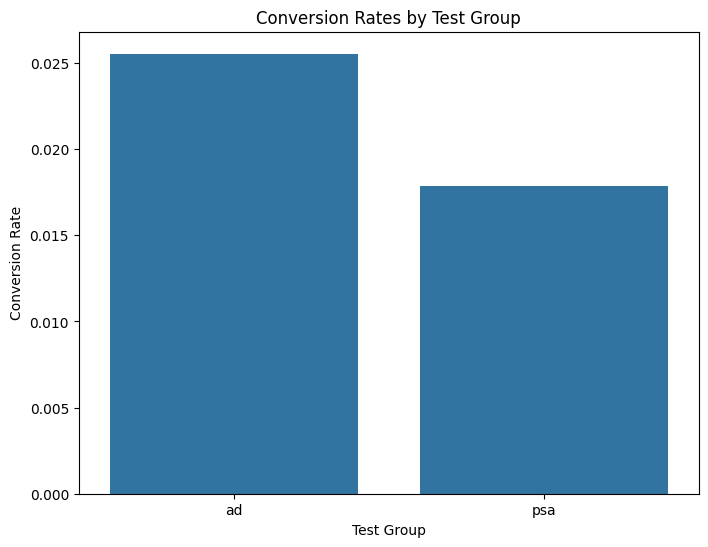

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='test group', y='converted', data=df, errorbar=None)
plt.title('Conversion Rates by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.show()

INFERENCE
from the AB Testing Analysis using the Marketing Dataset

Based on the chi-square test results you provided:

Chi-square statistic (Chi2): 54.0058
p-value: 1.9989623063390075e-13 (which is approximately 0)

 Interpretation:

1. Chi-square Statistic: The chi-square statistic measures the extent to which the observed counts in the contingency table deviate from the expected counts, assuming the null hypothesis is true.

2.p-value: The p-value is extremely small (close to 0), indicating strong evidence against the null hypothesis. In practical terms, this means:

    There is a statistically significant difference in the conversion rates between the test and control groups.
    The result suggests that the difference in conversion rates observed between the groups is unlikely to be due to random chance alone.

3.Conclusion: Based on these results:

   Reject the null hypothesis: There is a significant difference in conversion rates between the test and control groups.
   Accept the alternative hypothesis: The alternative hypothesis typically states that there is a difference between the groups, which in this case, aligns with the observed data.

Actionable Insights:

Implement changes: If the test group shows a higher conversion rate, consider implementing the changes or interventions tested in the test group on a broader scale.
  
Further investigation: Understand the factors contributing to the observed differences. Explore why the test group performed differently and how these insights can inform future marketing strategies or product development.

Monitor long-term effects: Continue to monitor the performance of the changes over time to assess their long-term impact on conversion rates and other relevant metrics.

This conclusion assumes that the data was properly collected and meets the assumptions of the chi-square test. Always ensure to interpret statistical results in context and consider the practical implications for your business or project.